#### Import libraries

In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

data_dir = "D:/tumor_segmentation/lgg-mri-segmentation/kaggle_3m"

images = []
masks = []

for patient_folder in os.listdir(data_dir):
    patient_path = os.path.join(data_dir, patient_folder)
    if os.path.isdir(patient_path):
        for file in os.listdir(patient_path):
            file_path = os.path.join(patient_path, file)
            if "mask" in file.lower():
                mask = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                mask = cv2.resize(mask, (128, 128))
                masks.append(mask)
            else:
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (128, 128))
                images.append(img)

X = np.array(images).reshape(-1, 128, 128, 1) / 255.0
y = np.array(masks).reshape(-1, 128, 128, 1) / 255.0  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("No of trained image :", X_train.shape)
print("No of mask image", y_train.shape)


No of trained image : (3143, 128, 128, 1)
No of mask image (3143, 128, 128, 1)


###  2. Build U-Net model


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 128, 128, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_19 (Conv2D)            │ (None, 128, 128, 64)      │             640 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_20 (Conv2D)            │ (None, 128, 128, 64)      │          36,928 │ conv2d_19[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 64, 64, 64)        │               0 │ conv2d_20[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_21 (Conv2D)            │ (None, 64, 64, 128)       │          73,856 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_22 (Conv2D)            │ (None, 64, 64, 128)       │         147,584 │ conv2d_21[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_5               │ (None, 32, 32, 128)       │               0 │ conv2d_22[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_23 (Conv2D)            │ (None, 32, 32, 256)       │         295,168 │ max_pooling2d_5[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_24 (Conv2D)            │ (None, 32, 32, 256)       │         590,080 │ conv2d_23[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_6               │ (None, 16, 16, 256)       │               0 │ conv2d_24[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_25 (Conv2D)            │ (None, 16, 16, 512)       │       1,180,160 │ max_pooling2d_6[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_26 (Conv2D)            │ (None, 16, 16, 512)       │       2,359,808 │ conv2d_25[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_7               │ (None, 8, 8, 512)         │               0 │ conv2d_26[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_27 (Conv2D)            │ (None, 8, 8, 1024)        │       4,719,616 │ max_pooling2d_7[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_28 (Conv2D)            │ (None, 8, 8, 1024)        │       9,438,208 │ conv2d_27[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9698 - loss: 0.1191

197/197 ━━━━━━━━━━━━━━━━━━━━ 1697s 9s/step - accuracy: 0.9858 - loss: 0.0591 - val_accuracy: 0.9890 - val_loss: 0.0410
Epoch 2/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 2817s 14s/step - accuracy: 0.9889 - loss: 0.0470 - val_accuracy: 0.9890 - val_loss: 0.0531
Epoch 3/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 2465s 13s/step - accuracy: 0.9889 - loss: 0.1178 - val_accuracy: 0.9890 - val_loss: 0.0438
Epoch 4/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 2545s 13s/step - accuracy: 0.9889 - loss: 0.0417 - val_accuracy: 0.9890 - val_loss: 0.0437
Epoch 5/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3381s 17s/step - accuracy: 0.9889 - loss: 0.0411 - val_accuracy: 0.9890 - val_loss: 0.0423
Epoch 6/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1826s 9s/step - accuracy: 0.9889 - loss: 0.0408 - val_accuracy: 0.9890 - val_loss: 0.0431
Epoch 7/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1702s 9s/step - accuracy: 0.9889 - loss: 0.0403 - val_accuracy: 0.9890 - val_loss: 0.0413
Epoch 8/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9888 - loss: 0.0399

197/197 ━━━━━━━━━━━━━━━━━━━━ 1738s 9s/step - accuracy: 0.9889 - loss: 0.0396 - val_accuracy: 0.9890 - val_loss: 0.0409
Epoch 9/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1726s 9s/step - accuracy: 0.9889 - loss: 0.0395 - val_accuracy: 0.9890 - val_loss: 0.0410
Epoch 10/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9889 - loss: 0.0407

197/197 ━━━━━━━━━━━━━━━━━━━━ 1657s 8s/step - accuracy: 0.9889 - loss: 0.0392 - val_accuracy: 0.9890 - val_loss: 0.0408
Epoch 11/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9890 - loss: 0.0385

197/197 ━━━━━━━━━━━━━━━━━━━━ 1649s 8s/step - accuracy: 0.9890 - loss: 0.0392 - val_accuracy: 0.9890 - val_loss: 0.0406
Epoch 12/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9889 - loss: 0.0397

197/197 ━━━━━━━━━━━━━━━━━━━━ 1659s 8s/step - accuracy: 0.9889 - loss: 0.0391 - val_accuracy: 0.9890 - val_loss: 0.0404
Epoch 13/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1642s 8s/step - accuracy: 0.9889 - loss: 0.0390 - val_accuracy: 0.9890 - val_loss: 0.0405
Epoch 14/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9890 - loss: 0.0380

197/197 ━━━━━━━━━━━━━━━━━━━━ 1657s 8s/step - accuracy: 0.9889 - loss: 0.0388 - val_accuracy: 0.9890 - val_loss: 0.0398
Epoch 15/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1688s 9s/step - accuracy: 0.9890 - loss: 0.0388 - val_accuracy: 0.9890 - val_loss: 0.0401
Epoch 16/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1676s 9s/step - accuracy: 0.9890 - loss: 0.0392 - val_accuracy: 0.9890 - val_loss: 0.0403
Epoch 17/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1670s 8s/step - accuracy: 0.9890 - loss: 0.0389 - val_accuracy: 0.9890 - val_loss: 0.0405
Epoch 18/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1636s 8s/step - accuracy: 0.9890 - loss: 0.0392 - val_accuracy: 0.9890 - val_loss: 0.0404
Epoch 19/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1636s 8s/step - accuracy: 0.9891 - loss: 0.0387 - val_accuracy: 0.9891 - val_loss: 0.0404
Epoch 20/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1628s 8s/step - accuracy: 0.9891 - loss: 0.0385 - val_accuracy: 0.9891 - val_loss: 0.0403


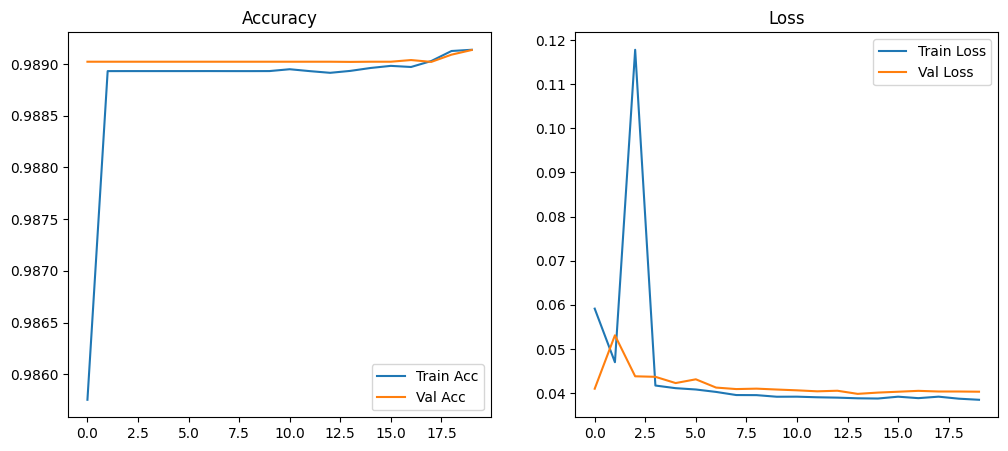

In [8]:
# 1. Import libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# =====================================================
# 2. Build U-Net model
def unet_model(input_size=(128, 128, 1)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2,2))(c1)

    c2 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2,2))(c2)

    c3 = layers.Conv2D(256, (3,3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3,3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2,2))(c3)

    c4 = layers.Conv2D(512, (3,3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3,3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D(pool_size=(2,2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3,3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3,3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2,2), strides=(2,2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3,3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3,3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2,2), strides=(2,2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3,3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3,3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1,1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# =====================================================
# 3. Initialize the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# =====================================================
# 4. Callbacks (EarlyStopping + Save Best Model)
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    ModelCheckpoint("unet_brain_tumor.h5", save_best_only=True, monitor='val_loss')
]

# =====================================================
# 5. Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),   # to show val_loss & val_accuracy
    batch_size=16,                      
    epochs=20,                          # start with 10, then increase if stable
    callbacks=callbacks
)

# =====================================================
# 6. Plot Training Curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [4]:
model.save("unet_brain_tumor.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


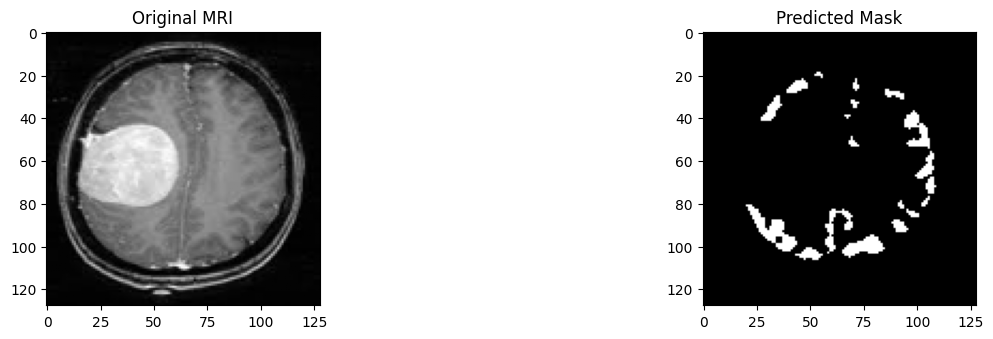

In [7]:
model = load_model("unet_brain_tumor.h5", compile=False)

# 2. Load a test MRI image (replace with your file path)
img = cv2.imread('D:/BrainTumorDataset/yes/Y1.jpg', cv2.IMREAD_GRAYSCALE)  
img = cv2.resize(img, (128,128))  
img = img / 255.0  # normalize
img_input = np.expand_dims(img, axis=(0, -1))  # (1,128,128,1)

# 3. Predict mask
pred_mask = model.predict(img_input)
pred_mask = (pred_mask[0,:,:,0] > 0.3).astype(np.uint8)  # threshold

# 4. Display results
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Original MRI")

# لو عندك الماسك الحقيقي (Ground Truth)
# mask = cv2.imread("test_mask.png", cv2.IMREAD_GRAYSCALE)
# mask = cv2.resize(mask, (128,128))
# plt.subplot(1,3,2)
# plt.imshow(mask, cmap="gray")
# plt.title("Ground Truth")

plt.subplot(1,3,3)
plt.imshow(pred_mask, cmap="gray")
plt.title("Predicted Mask")

plt.show()


In [8]:
print(pred_mask)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
import os
print(os.path.exists("unet_brain_tumor.keras"))


True
